## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
print('Libraries loaded')

Libraries loaded


## 2. Prepare Synthetic Dataset

In [2]:
X, y = make_classification(n_samples=800, n_features=50, n_informative=40, 
                           n_redundant=5, n_classes=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print('Prepared dataset — scaled for logistic regression')

Prepared dataset — scaled for logistic regression


## 3. Train Logistic Regression (Multinomial)

In [3]:
# Multinomial logistic regression (softmax)
clf = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=1.0, max_iter=1000)
clf.fit(X_train_s, y_train)

print('Train acc:', clf.score(X_train_s, y_train))
print('Test acc: ', clf.score(X_test_s, y_test))

y_pred = clf.predict(X_test_s)
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

Train acc: 0.7683333333333333
Test acc:  0.685

Classification report:

              precision    recall  f1-score   support

           0       0.65      0.78      0.71        67
           1       0.74      0.69      0.71        67
           2       0.67      0.59      0.63        66

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.68       200



/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 4. Regularization Effect (C parameter)

/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From the

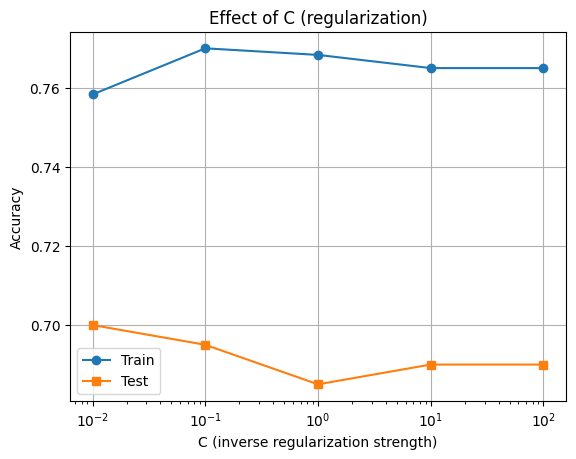

In [4]:
Cs = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []
for C in Cs:
    model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=C, max_iter=1000)
    model.fit(X_train_s, y_train)
    train_scores.append(model.score(X_train_s, y_train))
    test_scores.append(model.score(X_test_s, y_test))

plt.plot(Cs, train_scores, 'o-', label='Train')
plt.plot(Cs, test_scores, 's-', label='Test')
plt.xscale('log')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('Effect of C (regularization)')
plt.legend()
plt.grid(True)
plt.show()

## 5. L1 vs L2 Regularization

In [5]:
# L1 encourages sparsity (feature selection)
model_l1 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=1.0, max_iter=1000)
model_l2 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=1.0, max_iter=1000)

model_l1.fit(X_train_s, y_train)
model_l2.fit(X_train_s, y_train)

print('L1 Test acc:', model_l1.score(X_test_s, y_test))
print('L2 Test acc:', model_l2.score(X_test_s, y_test))

# Count non-zero coefficients
print('Non-zero coef (L1):', np.sum(np.abs(model_l1.coef_) > 1e-6))
print('Non-zero coef (L2):', np.sum(np.abs(model_l2.coef_) > 1e-6))

/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


L1 Test acc: 0.685
L2 Test acc: 0.685
Non-zero coef (L1): 89
Non-zero coef (L2): 150


## 6. Hyperparameter Tuning (GridSearch)

In [6]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

grid = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000), param_grid, cv=4, n_jobs=-1)
grid.fit(X_train_s, y_train)
print('Best params:', grid.best_params_)
print('CV best score:', grid.best_score_)
print('Test score:', grid.score(X_test_s, y_test))
best_model = grid.best_estimator_

/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From the

Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
CV best score: 0.6766666666666666
Test score: 0.7


/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thathsara-bandara/Desktop/Thathsara/CV - Projects/FusionX1.o/face_recognition_system/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 

## 7. Comparison with SVM & Random Forest

In [7]:
svm = SVC(kernel='rbf', C=1.0)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

svm.fit(X_train_s, y_train)
rf.fit(X_train, y_train)

print('Logistic (best) Test acc:', best_model.score(X_test_s, y_test))
print('SVM Test acc:', svm.score(X_test_s, y_test))
print('RandomForest Test acc:', rf.score(X_test, y_test))

Logistic (best) Test acc: 0.7
SVM Test acc: 0.845
RandomForest Test acc: 0.75


## 8. Practical Tips

- Always scale features for logistic regression.
- Use `saga` solver for L1 regularization and large datasets.
- Multinomial loss is preferred for true multiclass problems.
- L1 can be used for feature selection; L2 for generalization.

---
**Created for Computer Vision Course**